<a href="https://colab.research.google.com/github/Ahmethan96/Neural-netweok/blob/main/MLP_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Need to run this to allow multiple ouputs

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#!pip3 install Cython
import torch
import torch.nn as nn
import torch.nn.functional as F

seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


*Example* 1 Implemenatation of an MLP in Pytorch with two linear fully connected objects fc1 and fc2 and a Rectified Linear Unit (ReLU) applied to the output of the 1st linear layer

In [ ]:
from keras.layers import Dense
from keras.layers.serialization import activation
import torch.nn as nn
import torch.nn.functional as F
from keras.models import Sequential
# model = Sequential()
# model.add(Dense(256, input_shape = 1, ), activation = 'softmax')
# model.add(Dense(Dense))





class MultilayerPerceptron(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Args:
            input_dim (int): the size of the input vectors
            hidden_dim (int): the output size of the first Linear layer
            output_dim (int): the output size of the second Linear layer
        """
        super(MultilayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x_in, apply_softmax=False):
        """The forward pass of the MLP
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, input_dim)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, output_dim)
        """
        intermediate = F.relu(self.fc1(x_in))
        output = self.fc2(intermediate)
        
        if apply_softmax:
            output = F.softmax(output, dim=1)
        return output




NameError: ignored

Class Inheritance
Inheritance allows us to define a (child) class that inherits all the methods and properties from another (parent) class. See the following link to know about python inheretance: https://www.w3schools.com/python/python_inheritance.asp

ReLU (Rectified linar unit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """


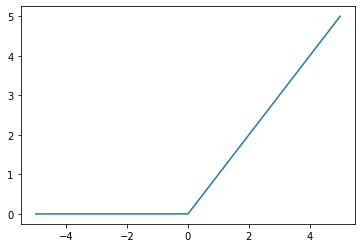

In [ ]:
import torch
import matplotlib.pyplot as plt

relu = torch.nn.ReLU()
x = torch.range(-5.,5.,0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

Tanh activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


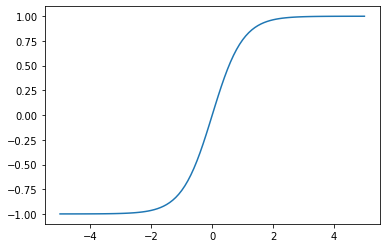

In [ ]:
import torch
import matplotlib.pyplot as plt
x = torch.range(-5.,5.,0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

Sigmoid activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  after removing the cwd from sys.path.


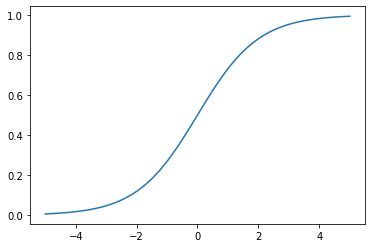

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.range(-5.,5.,0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(),y.numpy())
plt.show()


Example 2 Instantiation of an MLP. Outputs are random as model has not yet been trained.

In [ ]:
batch_size = 2 # number of samples input at once
input_dim = 3
hidden_dim = 100
output_dim = 4

# Initialize model
mlp = MultilayerPerceptron(input_dim, hidden_dim, output_dim)
print(mlp)

mlp = MultilayerPerceptron()


MultilayerPerceptron(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=4, bias=True)
)


Example 3. Testing MLP with random inputs

In [ ]:
def describe(x):
    print("Type: {}".format(x.type()))
    print("Shape/size: {}".format(x.shape))
    print("Values: \n{}".format(x))

In [ ]:
# Inputs
x_input = torch.rand(batch_size, input_dim)
describe(x_input)

NameError: ignored

In [ ]:
y_output = mlp(x_input, apply_softmax=False)
describe(y_output)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 4])
Values: 
tensor([[-0.2456,  0.0723,  0.1589, -0.3294],
        [-0.3497,  0.0828,  0.3391, -0.4271]], grad_fn=<AddmmBackward>)




Example 4. Adding probabilities with softMax. SoftMax trranforms a vector of values into probabilities (Transforming predictions into probabilities). 

In [ ]:
y_output = mlp(x_input, apply_softmax=True)
describe(y_output)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 4])
Values: 
tensor([[0.2087, 0.2868, 0.3127, 0.1919],
        [0.1832, 0.2824, 0.3649, 0.1696]], grad_fn=<SoftmaxBackward>)


*Example* 5 MLP with dropout. Probabilistically dropping out connections between units to avoid over fitting (At training phase only)

Please take time to read about 'What is Dropout?' here is an example linek:
https://medium.com/analytics-vidhya/a-simple-introduction-to-dropout-regularization-with-code-5279489dda1e


In [ ]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Args:
            input_dim (int): the size of the input vectors
            hidden_dim (int): the output size of the first Linear layer
            output_dim (int): the output size of the second Linear layer
        """
        super(MultilayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x_in, apply_softmax=False):
        """The forward pass of the MLP
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, input_dim)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, output_dim)
        """
        intermediate = F.relu(self.fc1(x_in))
        output = self.fc2(F.dropout(intermediate, p=0.5))
  
    # def drop_out(self,  )
        
        if apply_softmax:
            output = F.softmax(output, dim=1)
        return output

batch_size = 2 # number of samples input at once
input_dim = 3
hidden_dim = 100
output_dim = 4

# Initialize model
mlp = MultilayerPerceptron(input_dim, hidden_dim, output_dim)
print(mlp)

y_output = mlp(x_input, apply_softmax=False)
describe(y_output)


MultilayerPerceptron(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=4, bias=True)
)


NameError: ignored

Example 6. Creat a convolotion layer

In [ ]:

batch_size = 2
one_hot_size = 10
sequence_width = 7
data = torch.randn(batch_size, one_hot_size, sequence_width)
conv1 = nn.Conv1d(in_channels=one_hot_size, out_channels=16, kernel_size=3)
intermediate1 = conv1(data)
print(data.size())
print(intermediate1.size())

torch.Size([2, 10, 7])
torch.Size([2, 16, 5])


-what is the strid for the previous convolotion layer? Try different value for stride to see how it affects the output size. Search pytorch.nnconv1d to find more information about the layer (https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html)

Example 7

In [ ]:
conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)

intermediate2 = conv2(intermediate1)
intermediate3 = conv3(intermediate2)

print(intermediate2.size())
print(intermediate3.size())

torch.Size([2, 32, 3])
torch.Size([2, 64, 1])


In [ ]:
y_output = intermediate3.squeeze()
print(y_output.size())

torch.Size([2, 64])


In [ ]:
intermediate2.mean(dim=0).mean(dim=1).sum()

tensor(-0.0493, grad_fn=<SumBackward0>)

Example 8

In [ ]:
# Method 2 of reducing to feature vectors
print(intermediate1.view(batch_size, -1).size())

# Method 3 of reducing to feature vectors
print(torch.mean(intermediate1, dim=2).size())

torch.Size([2, 80])
torch.Size([2, 16])


Example 9
The full model will not be reproduced here. Instead, we will just show batch norm being used.

In [ ]:
conv1 = nn.Conv1d(in_channels=one_hot_size, out_channels=16, kernel_size=3)
conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)

conv1_bn = nn.BatchNorm1d(num_features=16)
conv2_bn = nn.BatchNorm1d(num_features=32)
    
intermediate1 = conv1_bn(F.relu(conv1(data)))
intermediate2 = conv2_bn(F.relu(conv2(intermediate1)))
intermediate3 = conv3(intermediate2)

print(intermediate1.size())
print(intermediate2.size())
print(intermediate3.size())

torch.Size([2, 16, 5])
torch.Size([2, 32, 3])
torch.Size([2, 64, 1])


Note: BatchNorm computes its statistics over the batch and sequence dimensions. In other words, the input to each batchnorm1d is a tensor of size (B, C, L) (where b=batch, c=channels, and l=length). Each (B, L) slice should have 0-mean. This reduces covariate shift.

In [ ]:
intermediate2.mean(dim=(0, 2))

tensor([ 0.0000e+00,  3.7253e-09,  0.0000e+00, -1.9868e-08, -9.9341e-09,
        -9.9341e-09,  4.9671e-09, -2.9802e-08,  6.2088e-10, -9.9341e-09,
         2.4835e-09,  0.0000e+00,  2.4835e-09,  9.9341e-09,  1.9868e-08,
         9.3132e-10, -4.9671e-09, -3.4769e-08, -4.9671e-09,  0.0000e+00,
        -2.7164e-10,  5.9605e-08, -2.0179e-09,  0.0000e+00,  9.9341e-09,
         9.9341e-09,  1.9868e-08,  1.4901e-08, -1.2418e-09,  9.9341e-09,
         9.9341e-09,  5.9605e-08], grad_fn=<MeanBackward2>)

* what is the mean value of each batch before the batch normalisation?
* what is the variance before and after batch normalisation?

Bonus Examples
We have covered convolutions. Below are code examples which instantiate the convolutions with various hyper parameter settings.

In [ ]:
import torch
import torch.nn as nn

x = torch.randn(1, 2, 3, 3)
print('############### 1-Describ input:')
describe(x)

conv1 = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=2)
print('############### 2-Describe conv1.weght:')
describe(conv1.weight)
print('############### 3-Describe conv1(x):')
describe(conv1(x))

############### 1-Describ input:
Type: torch.FloatTensor
Shape/size: torch.Size([1, 2, 3, 3])
Values: 
tensor([[[[ 4.8213e-01,  1.3940e-01, -8.9263e-04],
          [-8.5121e-01, -2.9713e-01,  2.6191e-01],
          [ 1.0586e+00, -1.2068e+00,  1.3321e+00]],

         [[-8.8502e-01,  1.5941e-03,  3.7165e-01],
          [ 6.9057e-02, -6.9986e-01, -3.8487e-01],
          [ 6.6203e-01, -9.1416e-01,  2.3235e+00]]]])
############### 4-Describe conv1.weght:
Type: torch.FloatTensor
Shape/size: torch.Size([1, 2, 2, 2])
Values: 
Parameter containing:
tensor([[[[ 0.0510, -0.3223],
          [ 0.3051,  0.0431]],

         [[-0.0567, -0.0198],
          [-0.2322,  0.0896]]]], requires_grad=True)
############### 3-Describe conv1(x):
Type: torch.FloatTensor
Shape/size: torch.Size([1, 1, 2, 2])
Values: 
tensor([[[[-0.2139,  0.1562],
          [ 0.2052,  0.1649]]]], grad_fn=<ConvolutionBackward0>)


2 dimentional convolotion: nn.Conv2d

In [ ]:
x = torch.randn(1, 1, 3, 3)
describe(x)

conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=2)
print('#################### 1-conv1.weight')
describe(conv1.weight)
print('#################### 2-conv1(x)')
describe(conv1(x))

Type: torch.FloatTensor
Shape/size: torch.Size([1, 1, 3, 3])
Values: 
tensor([[[[-0.0384,  0.7890, -0.2309],
          [-0.1425,  0.8491, -0.1441],
          [-0.3090,  1.3210, -1.3158]]]])
#################### 1-conv1.weight
Type: torch.FloatTensor
Shape/size: torch.Size([2, 1, 2, 2])
Values: 
Parameter containing:
tensor([[[[ 0.2173,  0.2795],
          [-0.0544, -0.3163]]],


        [[[-0.3081,  0.0766],
          [-0.4440, -0.4006]]]], requires_grad=True)
#################### 2-conv1(x)
Type: torch.FloatTensor
Shape/size: torch.Size([1, 2, 2, 2])
Values: 
tensor([[[[ 0.2852,  0.4402],
          [ 0.1392,  0.8226]],

         [[ 0.2249, -0.1505],
          [ 0.1464,  0.0975]]]], grad_fn=<ConvolutionBackward0>)


Loss Functions: Mean Squared Error Loss


A regression is a statistical technique that relates a dependent variable to one or more independent (explanatory) variables.


For regression problems for which the network’s output (ŷ) and the target (y) are continuous values, one common loss function is the mean squared error (MSE):


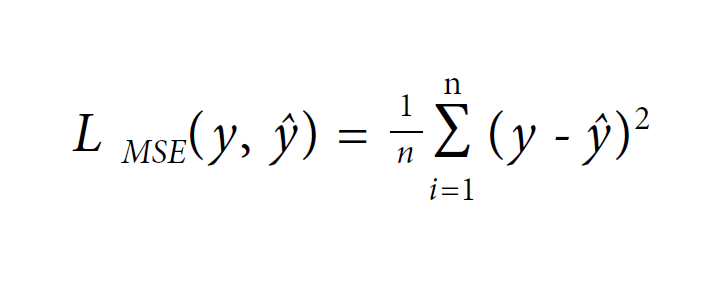

The MSE is simply the average of the squares of the difference between the predicted
and target values.

After describing the structure of a neural network, You need to train the network. Please see the following link to learn what is different steps to train a simple neural network:
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html


In [ ]:
import torch
import torch.nn as nn
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)


tensor(3.1692, grad_fn=<MseLossBackward0>)


[1] Natural language processing with PyTorch: build intelligent language applications using deep learning\

CHAPTER 3
Foundational Components of
Neural Networks

[2]What is Regression? Definition, Calculation, and Example

 https://www.investopedia.com/terms/r/regression.asp#:~:text=A%20regression%20is%20a%20statistical,more%20of%20the%20explanatory%20variables.